# Greedy heuristic model

## Contents:
1. [Notebook setup](#setup)
2. [Greedy heuristic model](#heuristic)

## 1. Notebook setup <a name="setup"></a>

In [1]:
# Install required packages.
# !pip install requirements.txt

# Change directory to main project folder.
import os
print(f'This folder: {os.getcwd()}')
os.chdir("..")
print(f'Project folder: {os.getcwd()}\n')

# Import packages.
import routing
import models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import dill
import time

This folder: C:\Users\muell\thesis_main\thesis_code\notebooks
Project folder: C:\Users\muell\thesis_main\thesis_code



In [2]:
# Load training data

# No training necessary for this model

## 2. Greedy heuristic model <a name="heuristic"></a>

### Final model

In [3]:
# No training necessary so we can directly define the final model.

In [4]:
def greedy_heuristic(X, verbose=50):
    y_pred = []
    t0 = time.time()
    for i in range(X.shape[0]):
        instance = routing.routingInstance.fromdict(X.iloc[i,:])
        instance.solve(
            first_solution='PATH_CHEAPEST_ARC',
            local_search='GREEDY',
            time_limit=1, 
            verbose=False)
        if hasattr(instance, 'solution_distance'):
            y_pred.append(instance.solution_distance)
        else:
            #y_pred.append(np.mean(y_train))
            y_pred.append(0)
        if (i+1) % verbose == 0:
            print('solved:', i+1, '; time elapsed:', time.time()-t0)
    return np.array(y_pred)

In [5]:
# save model

with open('models/baseline_heuristic.dill', 'wb') as file:
    dill.dump(greedy_heuristic, file)

### Training set predicitons

In [6]:
# Load training dataset

X_train = pd.read_pickle('data/generated_final_pickle/df_instances_train.pickle')
y_train = X_train.pop('solution_distance')
print(X_train.shape, y_train.shape)

(80000, 31) (80000,)


In [8]:
# Evaluate only on subset of test data due to time constraint

X_train = X_train.iloc[:600,:]
y_train = y_train.iloc[:600]
print(X_train.shape, y_train.shape)

(600, 31) (600,)


In [9]:
# Load the model

with open('models/baseline_heuristic.dill', 'rb') as file:
    greedy_heuristic = dill.load(file)

In [10]:
# Make predictions for training set

t0 = time.time()
y_pred = greedy_heuristic(X_train)
t1 = time.time()

solved: 50 ; time elapsed: 38.599859952926636
solved: 100 ; time elapsed: 77.28134989738464
solved: 150 ; time elapsed: 108.67758393287659
solved: 200 ; time elapsed: 145.90490627288818
solved: 250 ; time elapsed: 178.79652404785156
solved: 300 ; time elapsed: 214.71591424942017
solved: 350 ; time elapsed: 253.64935183525085
solved: 400 ; time elapsed: 290.8751585483551
solved: 450 ; time elapsed: 327.2084436416626
solved: 500 ; time elapsed: 362.9359986782074
solved: 550 ; time elapsed: 396.82966589927673
solved: 600 ; time elapsed: 434.81886863708496


In [11]:
# Model evaluation

models.evaluate(y_train, y_pred)

Model performance
--------------------------------------
MSE: 1321945.16
RMSE: 1149.76
MAE: 762.98
MAPE: 10.13%
R2: 0.96




### Final predictions

In [6]:
# The final predictions for the test set with this model is carried out in this notebook.
# The results are then imported in the final evaluation notebook.
# This is due to long evaluation time for this model so the final evaluation notebook can run quickly.
# Also this model uses the instances directly as input instead of the features.

In [9]:
# Load test dataset

X_test = pd.read_pickle('data/generated_final_pickle/df_instances_test.pickle')
y_test = X_test.pop('solution_distance')
print(X_test.shape, y_test.shape)

(20000, 31) (20000,)


In [10]:
# Evaluate only on subset of test data due to time constraint

X_test = X_test.iloc[:1000,:]
y_test = y_test.iloc[:1000]
print(X_test.shape, y_test.shape)

(1000, 31) (1000,)


In [11]:
# Load the model

with open('models/baseline_heuristic.dill', 'rb') as file:
    greedy_heuristic = dill.load(file)

In [12]:
# Make predictions for test set

t0 = time.time()
y_pred = greedy_heuristic(X_test)
t1 = time.time()

solved: 50 ; time elapsed: 36.17597556114197
solved: 100 ; time elapsed: 78.02622079849243
solved: 150 ; time elapsed: 109.07624173164368
solved: 200 ; time elapsed: 147.11110925674438
solved: 250 ; time elapsed: 183.9694538116455
solved: 300 ; time elapsed: 216.15520524978638
solved: 350 ; time elapsed: 253.08581042289734
solved: 400 ; time elapsed: 294.1789264678955
solved: 450 ; time elapsed: 330.7056679725647
solved: 500 ; time elapsed: 369.6020996570587
solved: 550 ; time elapsed: 407.8505299091339
solved: 600 ; time elapsed: 443.82842993736267
solved: 650 ; time elapsed: 483.63860988616943
solved: 700 ; time elapsed: 518.2905642986298
solved: 750 ; time elapsed: 555.8518204689026
solved: 800 ; time elapsed: 588.0446157455444
solved: 850 ; time elapsed: 623.0814208984375
solved: 900 ; time elapsed: 658.6945216655731
solved: 950 ; time elapsed: 696.8740410804749
solved: 1000 ; time elapsed: 734.1363444328308


In [13]:
# Save predictions for final evaluation notebook

greedy_heuristic_result = (y_test, y_pred, t1-t0)
# with open('models/baseline_heuristic_result.pkl', 'wb') as f:
#     pickle.dump(greedy_heuristic_result, f)

In [14]:
# Model evaluation

models.evaluate(y_test, y_pred)

Model performance
--------------------------------------
MSE: 1244691.4
RMSE: 1115.66
MAE: 767.48
MAPE: 10.11%
R2: 0.96




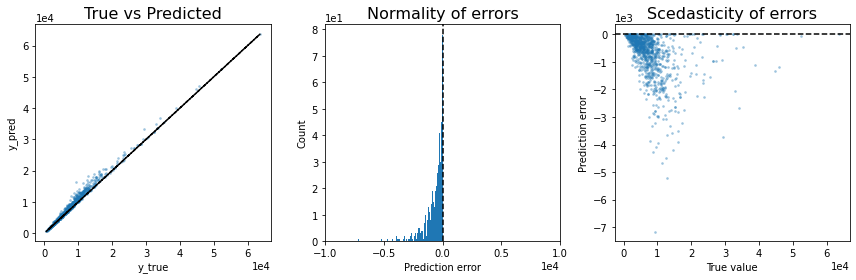

In [15]:
models.plot_performance(y_test, y_pred)